In [1]:
import gsd.hoomd
import matplotlib.pyplot as plt

from polykit.renderers import viewers
from matplotlib.colors import LinearSegmentedColormap

In [2]:
# Load example (HooMD-generated) input configuration
snap = gsd.hoomd.open("../data/hoomd_snapshot.gsd", 'r')[0]

In [3]:
# Grab linear dimension of simulation box
box_size = snap.configuration.box[0]

In [4]:
# Grab simulated bond data
bonds = snap.bonds.group
bond_ids = snap.bonds.typeid

In [5]:
# Grab cohesin genomic positions
cohesin_bonds = bonds[bond_ids==snap.bonds.types.index('LEF')]

In [6]:
# Grab monomer & cohesin 3D positions
positions = snap.particles.position
cohesin_positions = positions[cohesin_bonds].reshape((-1,3))

In [7]:
# Create DNA and cohesin rasters
raster_dna = viewers.rasterize(positions, box_size)
raster_cohesin = viewers.rasterize(cohesin_positions, box_size)

In [8]:
# Generate green/magenta colormaps for cohesin & DNA, respectively
cm_green = LinearSegmentedColormap.from_list(
        "Green", [(0, 0, 0), (0, 1, 0)], N=20)
cm_magenta = LinearSegmentedColormap.from_list(
        "Magenta", [(0, 0, 0), (1, 0, 1)], N=20)

In [9]:
# Perform maximum intensity projection onto the (x,y) plane
pixel_map_dna = viewers.voxels_to_pixels_RGB(raster_dna, cm_magenta, mode='max', axis=2)
pixel_map_cohesin = viewers.voxels_to_pixels_RGB(raster_cohesin, cm_green, mode='max', axis=2)

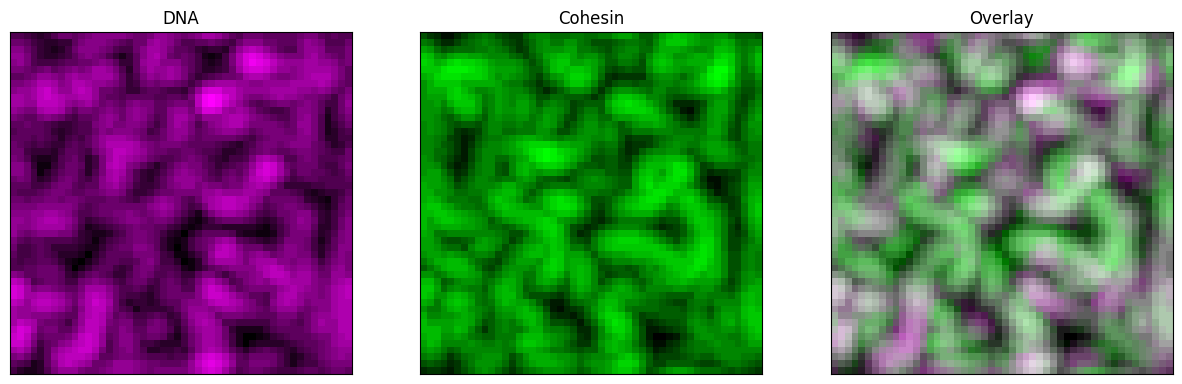

In [10]:
# Plot resulting pixel maps
plt.figure(figsize=(5*3,5))

plt.subplot(1,3,1)
plt.title('DNA')

plt.imshow(pixel_map_dna)

plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.subplot(1,3,2)
plt.title('Cohesin')

plt.imshow(pixel_map_cohesin)

plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)

plt.subplot(1,3,3)
plt.title('Overlay')

plt.imshow(pixel_map_dna+pixel_map_cohesin)

plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)